In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.style as style
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D
import matplotlib.gridspec as gridspec
import matplotlib.mlab as mlab
import matplotlib.patches as patches
%matplotlib inline
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import norm

In [2]:
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.sans-serif'] = "Arial"


## Import all wij for all models

In [3]:
allW = np.loadtxt('b12.all.model.wij.flatten.csv')

In [4]:
volcano = pd.read_csv("volcano_plot_distance_12_full.csv")
volcano['absw'] = abs(volcano['strength'])
volcano_sort = volcano.sort_values(by=['abstval'], ascending=False)

## Drug-activity node -- direct target

In [5]:
posctrl = ["aMEK_MAPKpT202","aAKT_AKTpS473","aHDAC_p27","aMDM2_4EBP1pS65", 
           "aJAK_GSK3abpS21","aBRAFm_MAPKpT202","aPKC_S6pS240","aCDK4_RbpS807",
           "aSRC_GSK3abpS21","aSTAT3_STAT3pY705","amTOR_S6pS240","aPI3K_AKTpS473"]
coi = [i for i, e in enumerate(volcano_sort['edge']) if e in posctrl]
df = {"Upstream":[x.split("_")[0] for x in volcano_sort['edge'].iloc[coi]], 
      "Downstream":[x.split("_")[1] for x in volcano_sort['edge'].iloc[coi]], 
      "Strength":round(volcano_sort['strength'].iloc[coi],3), 
      "T-value":round(volcano_sort['tval'].iloc[coi],3), 
      "Reference":None}
posctrl_table = pd.DataFrame(data=df)
#posctrl_table.to_csv("positive_ctrl_interactions.csv", index=None)

## Top interactions coming from unique nodes

In [6]:
# top 2 interactions from unique node
used1 = []
used2 = []
unqints = []
ints = [x for x in volcano_sort['edge'] if x[0] != 'a']
for ind_int in ints:
    if ind_int.split("_")[0] not in used1:
        if ind_int.split("_")[1] not in ["G1arrest","G2M","Sarrest","G2arrest","cellviab"]:
            unqints.append(ind_int)
            used1.append(ind_int.split("_")[0])
    elif ind_int.split("_")[0] not in used2:
        if ind_int.split("_")[1] not in ["G1arrest","G2M","Sarrest","G2arrest","cellviab"]:
            unqints.append(ind_int)
            used2.append(ind_int.split("_")[0])
topunq = unqints[0:25]
uoi = [i for i, e in enumerate(volcano_sort['edge']) if e in topunq]
df = {"Upstream":[x.split("_")[0] for x in volcano_sort['edge'].iloc[uoi]], 
      "Downstream":[x.split("_")[1] for x in volcano_sort['edge'].iloc[uoi]], 
      "Strength":round(volcano_sort['strength'].iloc[uoi],3), 
      "T-value":round(volcano_sort['tval'].iloc[uoi],3), 
      "Reference":volcano_sort['interaction'].iloc[uoi]}
topunq_table = pd.DataFrame(data=df)
#topunq_table.to_csv("top_25_unique_interactions.csv", index=None)

/Users/cshen/.pyenv/versions/3.6.5/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


Text(-95, 55, 'A')

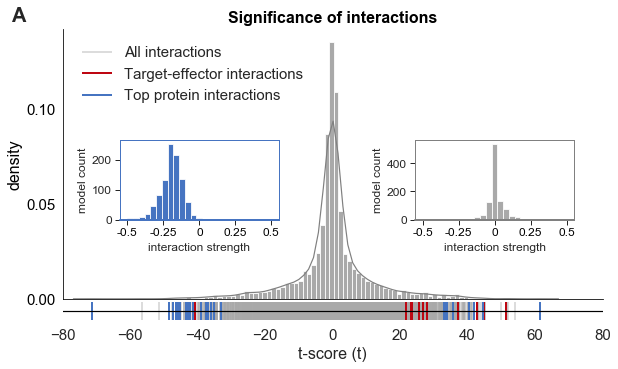

In [7]:
uoi_idx = volcano_sort.iloc[uoi,:].index
## First visualization
xlimits = (-80,80)
fig = plt.figure(figsize=(10,5))
ax0 = fig.add_axes([0.1, 0.18, 0.75, 0.75])
sns.despine(ax=ax0)
plt.gcf().subplots_adjust(top=0.8)
#fig, (ax0, ax1) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[20, 1]})
#plt.tight_layout()
#ax0.axis('off')
sns.set_style("ticks")
sns.set_context("paper")
ax0.set_xlim(xlimits)
#ax0.set_ylim(0,0.16)
#ax0.set_frame_on(False)
ax0.axes.get_xaxis().set_visible(False)
ax0.axes.get_yaxis().set_visible(True)
ax0.axes.get_yaxis().set_ticks([0,0.05,0.1,0.15])
ax0.tick_params(left="off", labelsize=15)
ax0.set_ylabel("density", size=16)
#ax0.text(-70,0.15,"Distribution of t-scores of all interactions across 1000 models", size=14)
ax0.set_title("Significance of interactions", size=16, weight='bold')

ax2 = plt.axes([0.18, 0.4, .22, .22])
sns.despine(top=False,right=False,left=False,ax=ax2)
for spine in ax2.spines.values():
    spine.set_edgecolor('#4674C1')
    spine.set_linewidth(1)
#ax2.axis('off')
sns.distplot(allW[:,uoi_idx[0]], bins=25, kde=False, hist_kws={'color': '#4674C1','alpha': 1,'range':(-0.5,0.5),'rwidth':1}, ax=ax2)
ax2.axhline(y=0, lw=2, color='#4674C1', clip_on=False)
ax2.set_xticks([-0.5,-0.25,0,0.25,0.5])
ax2.set_xticklabels([-0.5,-0.25,0,0.25,0.5], color="black",size=12)
ax2.set_yticks([0,100,200])
ax2.set_yticklabels([0,100,200], size=12)

# ax3 = plt.axes([0.63, 0.3, .22, .22])
# sns.despine(top=False,right=False,left=False,ax=ax3)
# for spine in ax3.spines.values():
#     spine.set_edgecolor('#BE0712')
#     spine.set_linewidth(1)
# sns.distplot(allW[:,coi_idx[0]], bins=25, kde=False, hist_kws={'color': "#BE0712",'alpha': 1,'range':(-0.5,0.5),'rwidth':1}, ax=ax3)
# ax3.axhline(y=0, lw=2, color='#BE0712', clip_on=False)
# ax3.set_xticks([-0.5,-0.25,0,0.25,0.5])
# ax3.set_xticklabels([-0.5,-0.25,0,0.25,0.5], color="black",size=12)
# ax3.set_yticks([0,50,100])
# ax3.set_yticklabels([0,50,100], size=12)

ax4 = plt.axes([0.59, 0.4, .22, .22])
sns.despine(top=False,right=False,left=False,ax=ax4)
for spine in ax4.spines.values():
    spine.set_edgecolor('gray')
    spine.set_linewidth(1)
sns.distplot(allW[:,4], bins=25, kde=False, hist_kws={'color': "darkgray",'alpha': 1,'range':(-0.5,0.5),'rwidth':1}, ax=ax4)
ax4.axhline(y=0, lw=2, color='gray', clip_on=False)
ax4.set_xticks([-0.5,-0.25,0,0.25,0.5])
ax4.set_xticklabels([-0.5,-0.25,0,0.25,0.5], color="black",size=12)
ax4.set_yticks([0,200,400])
ax4.set_yticklabels([0,200,400], size=12)

ax2.set_xlabel("interaction strength", size=12)
ax2.set_ylabel("model count", size=12)
# ax3.set_xlabel("interaction strength", size=12)
# ax3.set_ylabel("model count", size=12)
ax4.set_xlabel("interaction strength", size=12)
ax4.set_ylabel("model count", size=12)



#rect = patches.Rectangle((0.2,0.4),0.25,0.25,linewidth=1,edgecolor='#4674C1',facecolor='none')
# Add the patch to the Axes
#ax0.add_patch(rect)

ax1 = fig.add_axes([0.1, 0.12, 0.75, 0.05])
ax1.set_frame_on(False)
ax1.axes.get_yaxis().set_visible(False)
ax1.tick_params(bottom="off", labelsize=15)
#ax1.axes.get_xaxis().set_ticks([-30,-20,-10,0,10,20,30])
#ax1.set_xlim(-35,35)
sns.despine(ax=ax1)
sns.distplot(volcano_sort['tval'][-np.isnan(volcano_sort['tval'])], 100, hist=True, kde=True, rug=False,
             hist_kws={"color":"darkgray", "alpha":1}, kde_kws={"color":"grey"}, ax=ax0)
sns.distplot(volcano_sort['tval'], hist=False, kde=False, rug=True, 
             rug_kws={"color": "darkgray", "lw": 2, "height":5, "alpha":0.4}, ax=ax1)
sns.distplot(volcano_sort['tval'].iloc[coi], hist=False, kde=False, rug= True, 
             rug_kws={"color": "#BE0712", "lw": 2, "height":5, "alpha":1}, ax=ax1)
sns.distplot(volcano_sort['tval'].iloc[uoi], hist=False, kde=False, rug=True, 
             rug_kws={"color": "#4674C1", "lw": 2, "height":5, "alpha":1}, ax=ax1)

ax1.set_xlabel("t-score (t)", size=16)
ax1.set_xlim(xlimits)
ax1.legend(["All interactions","Target-effector interactions","Top protein interactions"], fontsize=15, bbox_to_anchor=(-0.03, 15.5, 0.5, 0.5), frameon=False)
ax1.axhline(y=1.5, xmin=-72, xmax=62, color="black")
ax1.text(-95,55,'A', weight='bold', size=20)

In [8]:
fig.savefig("Figure5A.pdf",format="pdf",dpi=fig.dpi)

Text(-0.55, 1850, 'B')

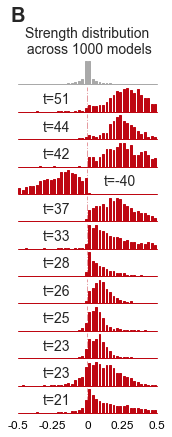

In [9]:
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
fig = plt.figure(figsize=(2.5,6.5))
outer = gridspec.GridSpec(13, 1)#, wspace=0.2, hspace=0.2)
coi_idx = volcano_sort.iloc[coi,:].index

for i in range(13):
    
    ax1 = fig.add_subplot(outer[i,0])
#    ax2 = fig.add_subplot(outer[i,1])
    sns.despine(left=True,bottom=True)
#    ax1.set_ylabel(str(i+1), color=pal1[i], rotation=0)
#    ax1.yaxis.set_label_coords(0,0.02)
    ax1.set_yticklabels([])        
    if i == 12:
        ax1.set_xticks([-0.5,-0.25,0,0.25,0.5])
        ax1.set_xticklabels([-0.5,-0.25,0,0.25,0.5], color="black",size=12)
        ax1.xaxis.set_tick_params(pad=0.9)
    else:
        ax1.set_xticks([])
        ax1.set_xticklabels([])

    ax1.set_xlim(-0.5,0.5)
#    ax1.set_ylim(0,3)

    if i == 0:
        drug_ints = volcano_sort['edge'][np.array([x[0] == 'a' for x in volcano_sort['edge']]) * np.array([x != 0 for x in volcano_sort['strength']])].index
        sns.distplot(allW[:,drug_ints].flatten(), bins=40, kde=False, 
                     hist_kws={'color': "darkgray",'alpha': 1,'range':(-0.5,0.5),'rwidth':0.55,'edgecolor':'darkgray'}, ax=ax1)
        ax1.axhline(y=0, lw=1, color="darkgray", clip_on=False)
        ax1.set_title("Strength distribution\n across 1000 models", size=14)
    
    else:
        sns.distplot(allW[:,coi_idx[i-1]], bins=40, kde=False, 
                     hist_kws={'color': "#BE0712",'alpha': 1,'range':(-0.5,0.5),'rwidth':0.55,'edgecolor':'#BE0712'}, ax=ax1)
        ax1.axvline(x=0, lw=1, linestyle="-.", color="#BE0712", alpha=0.4)
        ax1.axhline(y=0, lw=1, color="#BE0712", clip_on=False)
        tscore = int(volcano_sort.tval[coi_idx[i-1]])
        xpos = -0.32 if tscore > 0 else 0.12
        ax1.text(xpos,ax1.get_ylim()[1]/3,"t="+str(tscore),size=14)

#    sns.kdeplot(allW[:,coi_idx[i]], color=pal1[i], shade=True, alpha=1, lw=1.5, bw=.2, gridsize=3000, ax=ax1)
#    sns.kdeplot(allW[:,coi_idx[i]], shade=False, color="w", alpha=1, lw=1, bw=.2, gridsize=1000, ax=ax1)
    
fig.subplots_adjust(hspace=0.1)
ax1.text(-0.55,1850,'B', weight='bold', size=20)

In [10]:
fig.savefig("Figure5B.pdf", format="pdf")

Text(-0.55, 2920, 'C')

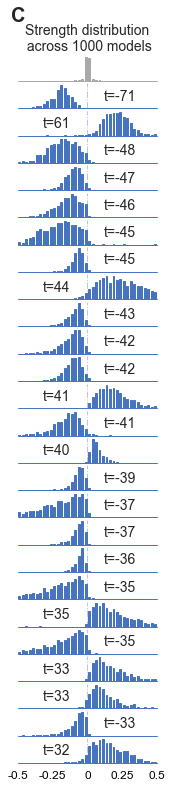

In [11]:
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
fig = plt.figure(figsize=(2.5,13))
outer = gridspec.GridSpec(26, 1)#, wspace=0.2, hspace=0.2)
uoi_idx = volcano_sort.iloc[uoi,:].index

for i in range(26):
    
    ax1 = fig.add_subplot(outer[i,0])
    sns.despine(left=True,bottom=True)
    ax1.set_yticklabels([])
    ax1.set_xlim(-0.5,0.5)

    if i == 25:
        ax1.set_xticks([-0.5,-0.25,0,0.25,0.5])
        ax1.set_xticklabels([-0.5,-0.25,0,0.25,0.5], color="black",size=12)
        ax1.xaxis.set_tick_params(pad=0.9)
    else:
        ax1.set_xticks([])
        ax1.set_xticklabels([])     
    
    if i == 0:
        prot_ints = volcano_sort['edge'][np.array([x[0] != 'a' for x in volcano_sort['edge']]) * np.array([x != 0 for x in volcano_sort['strength']]) * 
                                         np.array([x.split('_')[1] not in ["G1arrest","G2M","Sarrest","G2arrest","cellviab"] for x in volcano_sort['edge']])].index
        sns.distplot(allW[:,prot_ints].flatten(), bins=40, kde=False, 
                     hist_kws={'color': "darkgray",'alpha': 1,'range':(-0.5,0.5),'rwidth':0.55,'edgecolor':"darkgray"}, ax=ax1)
        ax1.axhline(y=0, lw=1, color="darkgray", clip_on=False)
        ax1.set_title("Strength distribution\n across 1000 models", size=14)
    else:
        ax1.axhline(y=0, lw=1, color='#4674C1', clip_on=False)
#    ax2.set_xlim(-(i+2)*0.04+0.02,-(i+2)*0.04+0.35)
#    ax2.set_ylim(0,45)
        sns.distplot(allW[:,uoi_idx[i-1]], bins=40, kde=False, 
                     hist_kws={'color': '#4674C1','alpha': 1,'range':(-0.5,0.5),'rwidth':0.55,'edgecolor':'#4674C1'}, ax=ax1)
#    ax2.set_xlim(min(min(allW[:,uoi_idx[i]]),0),max(max(allW[:,uoi_idx[i]]),0))
#    sns.kdeplot(allW[:,uoi_idx[i]], color=pal2[i], shade=True, alpha=1, lw=1.5, bw=.2, gridsize=1000, ax=ax2)
#    sns.kdeplot(allW[:,uoi_idx[i]], shade=False, color="w", alpha=1, lw=1.5, bw=.2, gridsize=1000, ax=ax2)
        ax1.axvline(x=0, lw=1, linestyle="-.", color="#4674C1", alpha=0.4)
        tscore = int(volcano_sort.tval[uoi_idx[i-1]])
        xpos = -0.32 if tscore > 0 else 0.12
        ax1.text(xpos,ax1.get_ylim()[1]/3,"t="+str(tscore),size=14)

fig.subplots_adjust(hspace=0.1)
ax1.text(-0.55,2920,'C', weight='bold', size=20)

In [12]:
fig.savefig("Figure5C.pdf", format="pdf")